<a href="https://colab.research.google.com/github/CurtCalledBurt/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

In [0]:
# Sprint challenge compenticies:
# - pd.concat
# - pd.merge
# - pd.pivot
# - pd.melt
# - The difference between "wide" and "tidy" data formats
# - The basics of matplotlib/seaborn plotting to be able to recreate a basic 538 graph.

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [7]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

In [8]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [58]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [9]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [88]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 30
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [62]:
entities.isna().sum()

country                     0
alt_5                     253
alternative_1             199
alternative_2             232
alternative_3             247
alternative_4_cdiac        58
arb1                      250
arb2                      264
arb3                      268
arb4                      270
arb5                      271
arb6                      271
g77_and_oecd_countries     14
gapminder_list             13
god_id                      2
gwid                       12
income_groups              59
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
name                        0
pandg                     126
un_state                    0
unicode_region_subtag      25
upper_case_name            33
world_4region               2
world_6region              13
dtype: int

In [12]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,https://www.gapminder.org/gapminder-world/docu...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,https://www.gapminder.org/data/documentation/g...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,https://www.ilo.org/ilostat/,labour_force_participation


In [13]:
print(income.shape)
print(lifespan.shape)

(46513, 3)
(44370, 3)


In [18]:
merged = pd.merge(income, lifespan)
merged = pd.merge(income,lifespan, how='inner', on=['geo','time'])
#these two are the same, default is 'inner' and
#it also auto looks for things in common to merge on

print(merged.shape)
merged.head()

(40437, 4)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,afg,1800,603,28.21
1,afg,1801,603,28.20
2,afg,1802,603,28.19
3,afg,1803,603,28.18
4,afg,1804,603,28.17


In [19]:
#check for duplicates
merged.duplicated(subset=['geo', 'time']).value_counts()

False    40437
dtype: int64

In [22]:
#count number of unique values in column
#if the number doesn't match the number of rows you
# have duplicates
merged['geo'].nunique()

187

In [24]:
df = pd.merge(merged, population)
print(df.shape)
df.head()

(40437, 5)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,afg,1800,603,28.21,3280000
1,afg,1801,603,28.20,3280000
2,afg,1802,603,28.19,3280000
3,afg,1803,603,28.18,3280000
4,afg,1804,603,28.17,3280000


In [25]:
df = pd.merge(df, 
             entities[['country', 'name', 'world_4region', 'world_6region']],
             left_on='geo', right_on='country')
print(df.shape)
df.head()

(40437, 9)


,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_4region,world_6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [26]:
df = df.rename(columns = {
    'country': 'country_code',
    'time': 'year',
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income',
    'life_expectancy_years': 'lifespan',
    'population_total': 'population',
    'name': 'country',
    'world_6region': '6region',
    'world_4region': '4region',
})

df.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia


In [28]:
df.dtypes

geo              object
year              int64
income            int64
lifespan        float64
population        int64
country_code     object
country          object
4region          object
6region          object
dtype: object

In [29]:
df.describe()

,year,income,lifespan,population
count,40437.000000,40437.000000,40437.000000,4.043700e+04
mean,1909.292900,4619.492717,43.132080,1.371204e+07
std,63.308682,10209.571045,16.313228,6.606335e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,876.000000,31.160000,4.113310e+05
50%,1909.000000,1442.000000,35.500000,1.985952e+06
75%,1964.000000,3488.000000,55.970000,6.499707e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [30]:
df.describe(exclude='number')

,geo,country_code,country,4region,6region
count,40437,40437,40437,40437,40437
unique,187,187,187,4,6
top,swe,swe,China,africa,europe_central_asia
freq,219,219,219,11826,10778


In [31]:
usa = df[df.country == 'United States']
usa.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
38028,usa,1800,2127,39.41,6801854,usa,United States,americas,america
38029,usa,1801,2167,39.41,6933517,usa,United States,americas,america
38030,usa,1802,2202,39.41,7067728,usa,United States,americas,america
38031,usa,1803,2166,39.41,7204538,usa,United States,americas,america
38032,usa,1804,2165,39.41,7343995,usa,United States,americas,america


In [32]:
usa.describe()

,year,income,lifespan,population
count,219.000000,219.000000,219.000000,2.190000e+02
mean,1909.000000,14572.936073,54.846256,1.163662e+08
std,63.364028,15066.042247,15.202079,9.738644e+07
min,1800.000000,2113.000000,31.000000,6.801854e+06
25%,1854.500000,3512.500000,39.410000,2.752198e+07
50%,1909.000000,7989.000000,51.780000,9.236198e+07
75%,1963.500000,20090.500000,70.270000,1.962540e+08
max,2018.000000,54898.000000,79.140000,3.267667e+08


In [33]:
usa[usa.year.isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
38046,usa,1818,2258,39.41,9879049,usa,United States,americas,america
38146,usa,1918,9371,47.18,106721812,usa,United States,americas,america
38246,usa,2018,54898,79.14,326766748,usa,United States,americas,america


In [34]:
china = df[df.country=='China']
china[china.year.isin([1818,1918,2018])]

,geo,year,income,lifespan,population,country_code,country,4region,6region
6854,chn,1818,985,32.00,374161494,chn,China,asia,east_asia_pacific
6954,chn,1918,989,22.13,462444535,chn,China,asia,east_asia_pacific
7054,chn,2018,16018,76.92,1415045928,chn,China,asia,east_asia_pacific


In [35]:
#time to plot!
import seaborn as sns

now = df[df.year == 2018]
then = df[df.year == 1918]
now.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
437,ago,2018,5846,65.19,30774205,ago,Angola,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,alb,Albania,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,are,United Arab Emirates,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,arg,Argentina,americas,america


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


(483.5453734847516, 100000)

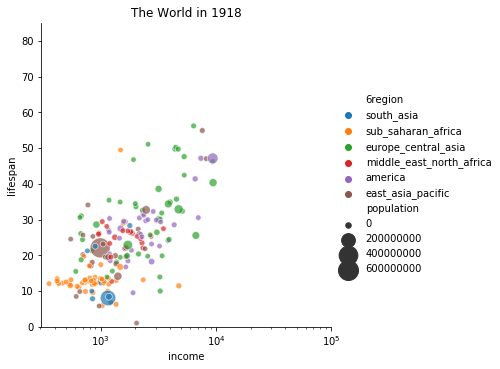

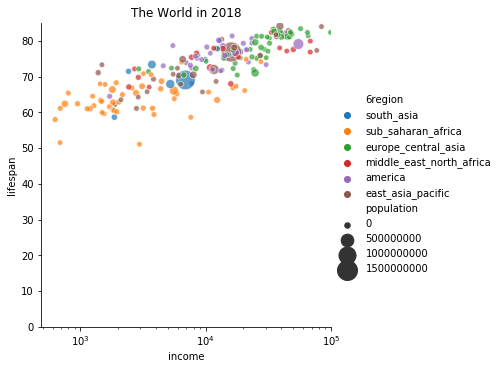

In [43]:
sns.relplot(x='income', y='lifespan', hue='6region', 
            size='population',
            sizes=(30, 400), alpha=0.7, data=then)
plt.xscale('log')
plt.title('The World in 1918')
plt.ylim(0,85)
plt.xlim(0,100000)

sns.relplot(x='income', y='lifespan', hue='6region',
           size='population', sizes=(30,400), alpha=0.7,
           data=now)
plt.xscale('log')
plt.title('The World in 2018')
plt.ylim(0,85)
plt.xlim(0,100000)

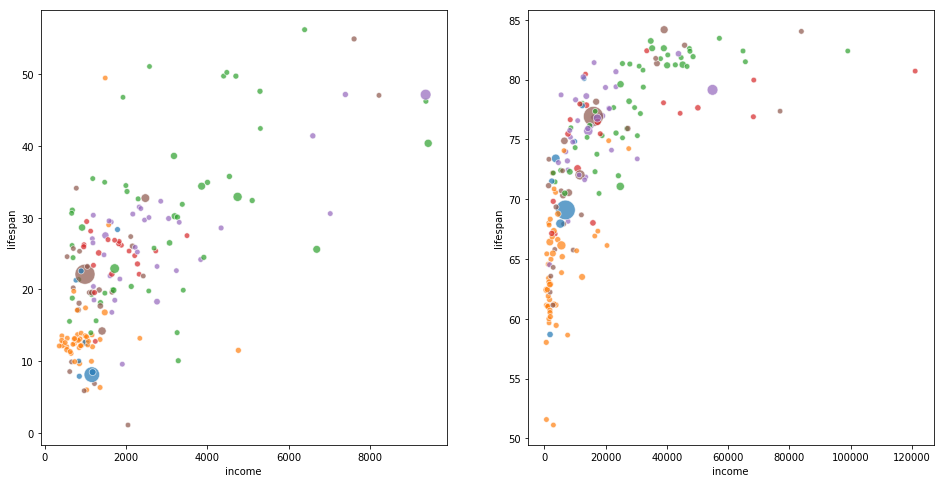

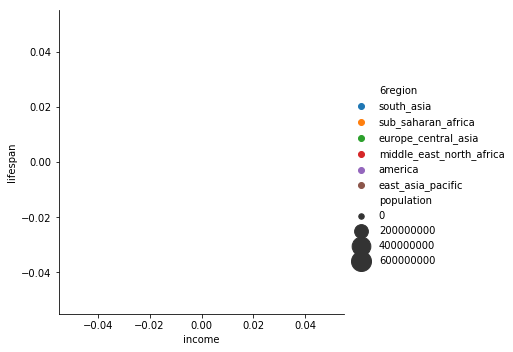

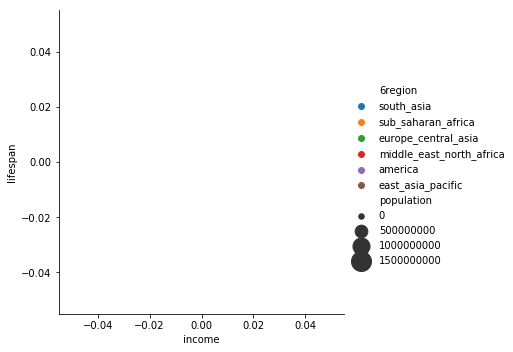

In [45]:
#figure/axes from matplotlib is still usable with seaborn
#typicall we only use it when working with multiple
#subgraphs

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

sns.relplot(x='income', y='lifespan', hue='6region',
           size='population', sizes=(30,400), alpha=0.7,
           data=then, ax=ax[0]);

sns.relplot(x='income', y='lifespan', hue='6region',
           size='population', sizes=(30,400), alpha=0.7,
           data=now, ax=ax[1]);

In [0]:
#Outlier: Qatar
now.sort_values('income', ascending=False);

In [47]:
now_qatar = now[now.country=='Qatar']
now_qatar.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
30362,qat,2018,121033,80.71,2694849,qat,Qatar,asia,middle_east_north_africa


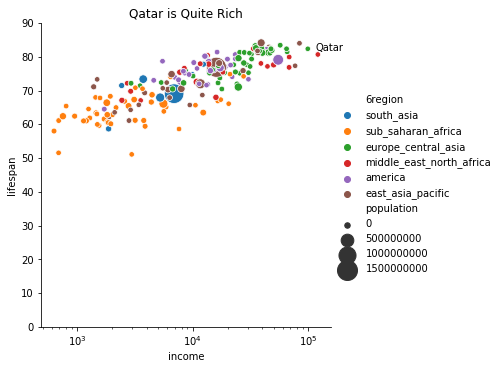

In [49]:
sns.relplot(x='income', y='lifespan', hue='6region', size='population',
          sizes=(30,400), data=now)
plt.xscale('log')
plt.ylim(0,90)
plt.title('Qatar is Quite Rich')
plt.text(x=now_qatar.income-5000, y=now_qatar.lifespan+1, s='Qatar')
plt.show()

In [50]:
#compare multiple years
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

centuries.head()

,geo,year,income,lifespan,population,country_code,country,4region,6region
18,afg,1818,604,28.03,3308390,afg,Afghanistan,asia,south_asia
118,afg,1918,849,7.89,5704092,afg,Afghanistan,asia,south_asia
218,afg,2018,1867,58.69,36373176,afg,Afghanistan,asia,south_asia
237,ago,1818,668,26.98,1586896,ago,Angola,africa,sub_saharan_africa
337,ago,1918,1174,12.01,3487015,ago,Angola,africa,sub_saharan_africa


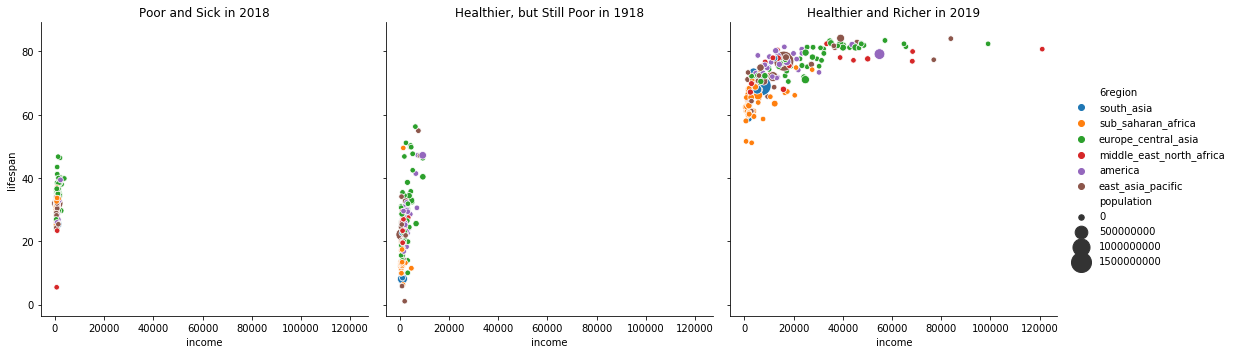

In [51]:
fig = sns.relplot(x='income', y='lifespan', 
                  hue='6region', size='population',
                  sizes=(30,400), col='year', data=centuries)

axes = fig.axes.flatten()
axes[0].set_title('Poor and Sick in 2018')
axes[1].set_title('Healthier, but Still Poor in 1918')
axes[2].set_title('Healthier and Richer in 2019');

In [0]:
#point out the story
years = [1918, 1938, 1978, 1998, 2018]

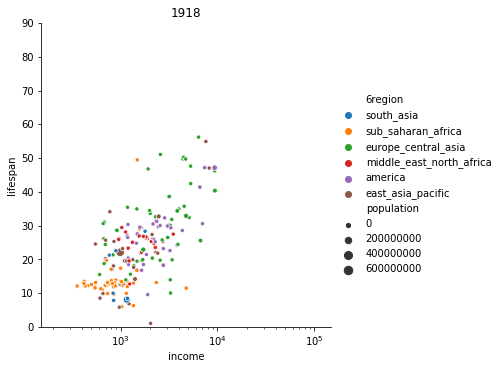

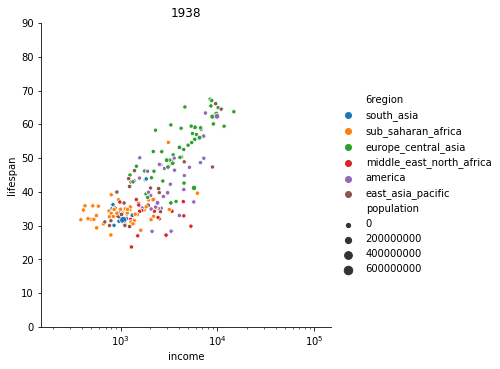

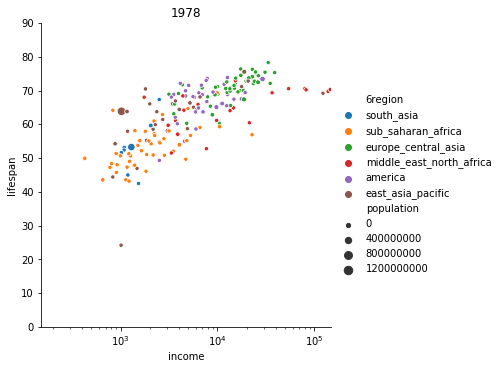

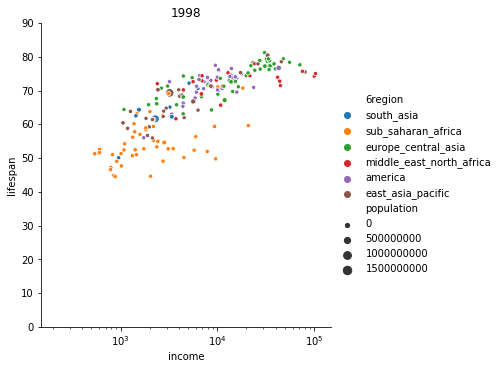

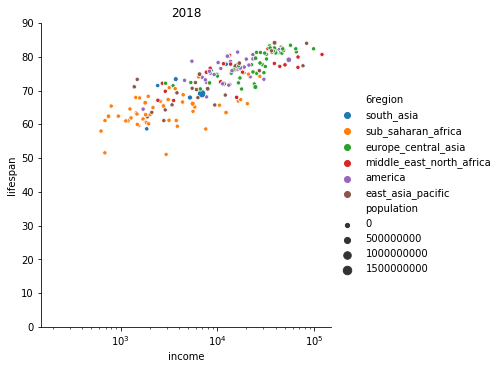

In [55]:
#for loop prints a bunch of subplots to different images,
#in case you don't want all the charts in one image file
for year in years:
  sns.relplot(x='income', y='lifespan', hue='6region',
             size='population', data=df[df.year==year])
  plt.xscale('log')
  plt.xlim((150, 150000))
  plt.ylim((0, 90))
  plt.title(year)

In [89]:
df

,geo,year,income,lifespan,population,country_code,country,4region,6region
0,afg,1800,603,28.21,3280000,afg,Afghanistan,asia,south_asia
1,afg,1801,603,28.20,3280000,afg,Afghanistan,asia,south_asia
2,afg,1802,603,28.19,3280000,afg,Afghanistan,asia,south_asia
3,afg,1803,603,28.18,3280000,afg,Afghanistan,asia,south_asia
4,afg,1804,603,28.17,3280000,afg,Afghanistan,asia,south_asia
5,afg,1805,603,28.16,3280000,afg,Afghanistan,asia,south_asia
6,afg,1806,603,28.15,3280000,afg,Afghanistan,asia,south_asia
7,afg,1807,603,28.14,3280000,afg,Afghanistan,asia,south_asia
8,afg,1808,603,28.13,3280000,afg,Afghanistan,asia,south_asia
9,afg,1809,603,28.12,3280000,afg,Afghanistan,asia,south_asia


In [0]:
#New story
entities = entities.rename(columns = {'country': 'geo'})
entities.head()


today2018 = df[df['year'] == 2018]

before1818 = df[df['year'] == 1818]

before1918 = df[df['year'] == 1918]

In [0]:
land_locked2018 = pd.merge(today2018, entities)
land_locked1818 = pd.merge(before1818, entities)
land_locked1918 = pd.merge(before1918, entities)

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


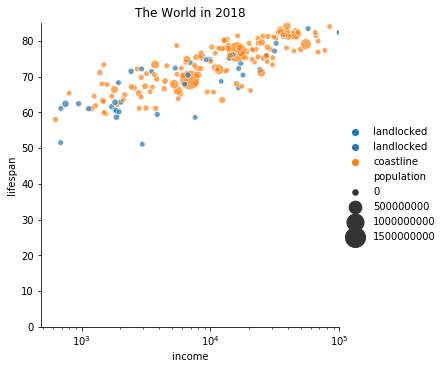

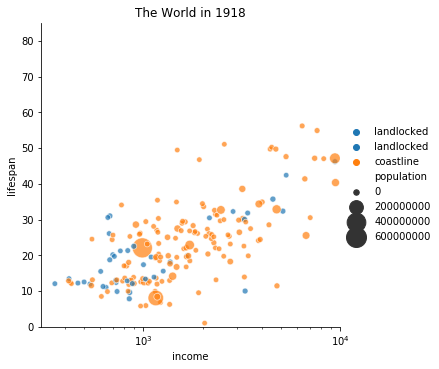

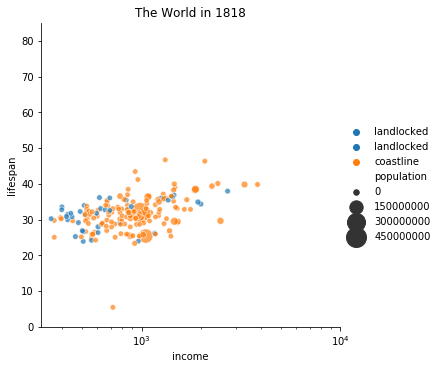

In [125]:
sns.relplot(x='income', y='lifespan', hue='landlocked', 
            size='population',
            sizes=(30, 400), alpha=0.7, data=land_locked2018)
plt.xscale('log')
plt.title('The World in 2018')
plt.ylim(0,85)
plt.xlim(0,100000)



sns.relplot(x='income', y='lifespan', hue='landlocked', 
            size='population',
            sizes=(30, 400), alpha=0.7, data=land_locked1918)
plt.xscale('log')
plt.title('The World in 1918')
plt.ylim(0,85)
plt.xlim(0,10000)



sns.relplot(x='income', y='lifespan', hue='landlocked', 
            size='population',
            sizes=(30, 400), alpha=0.7, data=land_locked1818)
plt.xscale('log')
plt.title('The World in 1818')
plt.ylim(0,85)
plt.xlim(0,10000)

plt.show;

In [0]:
#Judgeing from 1818 and 1918, it looks like being landlocked had a sizable influence on how wealthy a country could be,
#but it appears to not affect health in those two years. 
#note I have changed the x axis of 1918 and 1818 to only reach 10^4 in order to see the exact clumping of the dots
#better

#However, in 2018 that wealth advantage to coastal countries appears to mostly be gone with a lot of landlocked countries 
#reaching over to the right of the graph, with about the same spread as coastal countries.

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO